In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import skfuzzy as fuzz
from skfuzzy import control as ctrl

%matplotlib inline

In [5]:
df = pd.read_csv('actions_cleaned.csv')

df.head(10)

,actions,move_defs,att_defs
0,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]",DOWN,X
1,"[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]",DOWN,A
2,"[0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0]",DOWN,C
3,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0]",DOWN,Y
4,"[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]",DOWN,B
5,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1]",DOWN,Z
6,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]",DOWN,IDLE
7,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",IDLE,B
8,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",IDLE,A
9,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]",IDLE,Z


C:\Users\User\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


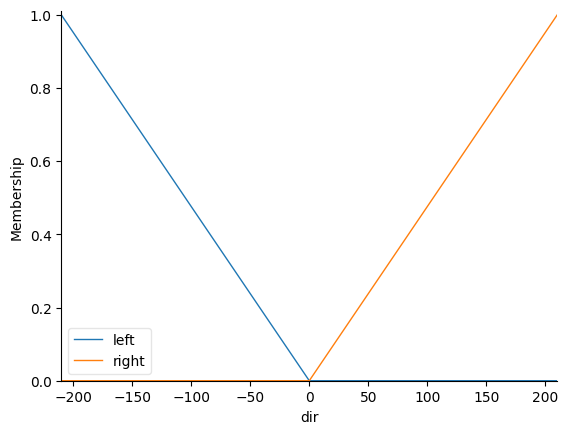

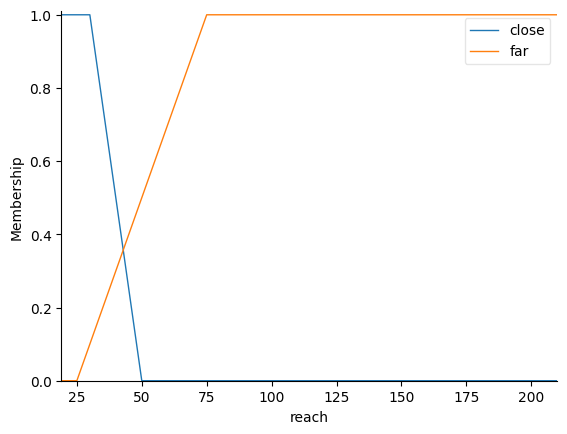

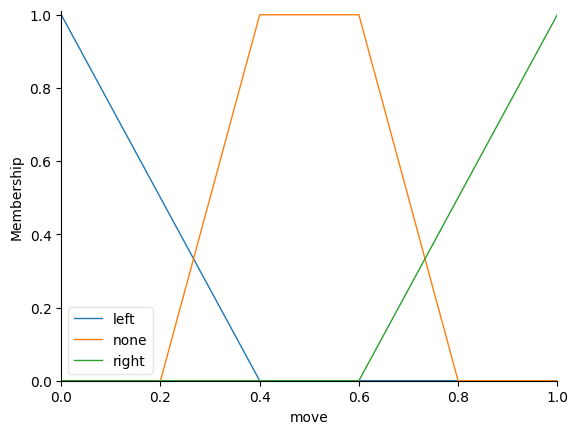

In [6]:
## Move layer 1
#Antecedent range
dir_range = np.arange(-210, 211, 1) #direction
reach_range = np.arange(19, 211, 1) #reach
#Consequent range
move_range = np.arange(0, 1.1, 0.1)

#Antecedent(s)
dir = ctrl.Antecedent(dir_range, 'dir')
reach = ctrl.Antecedent(reach_range, 'reach')

#direction membership function
dir['left'] = fuzz.trimf(dir_range, [-210, -210, 0])
dir['right'] = fuzz.trimf(dir_range, [0, 210, 210])
#reach membership function
reach['close'] = fuzz.trapmf(reach_range, [19, 19, 30, 50])
reach['far'] = fuzz.trapmf(reach_range, [25, 75, 210, 210])
#Consequent(s)
move = ctrl.Consequent(move_range, 'move')

#position mebership function
move['left'] = fuzz.trimf(move_range, [0, 0, 0.4])
move['none'] = fuzz.trapmf(move_range, [0.2, 0.4, 0.6, 0.8])
move['right'] = fuzz.trimf(move_range, [0.6, 1, 1])


dir.view()
reach.view()
move.view()

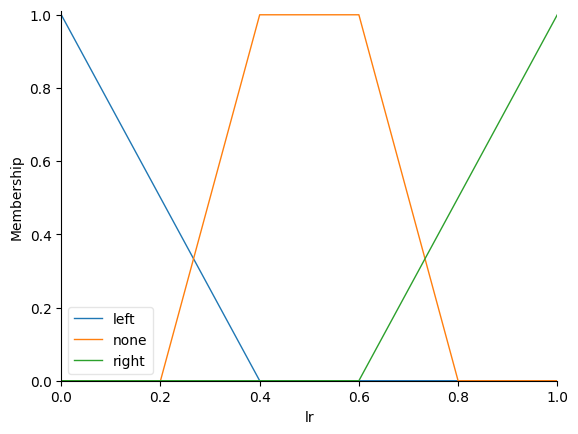

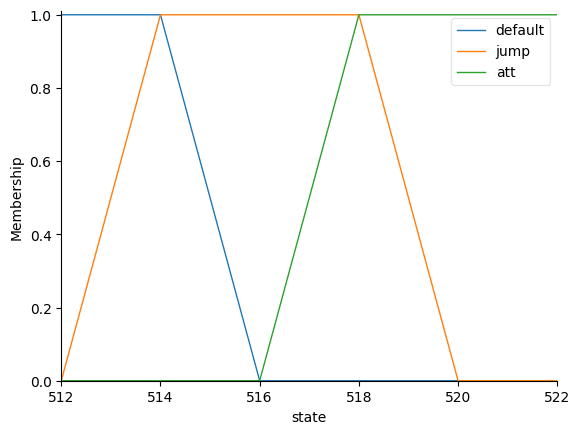

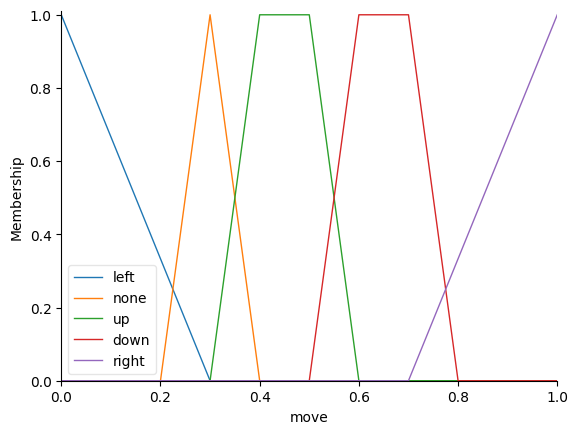

In [7]:
#move layer 2
#Antecedent range
lr_range = np.arange(0, 1.1, 0.1)      #left/right
state_range = np.arange(512, 524, 2)    #enemy state
#Consequent range
move_range = np.arange(0, 1.1, 0.1)

#Antecedent(s)
lr = ctrl.Antecedent(lr_range, 'lr')
state = ctrl.Antecedent(state_range, 'state')

#lr membership function
lr['left'] = fuzz.trimf(lr_range, [0, 0, 0.4])
lr['none'] = fuzz.trapmf(lr_range, [0.2, 0.4, 0.6, 0.8])
lr['right'] = fuzz.trimf(lr_range, [0.6, 1, 1])
#state membership function
state['default'] = fuzz.trapmf(state_range, [512, 512, 514, 516])
state['jump'] = fuzz.trapmf(state_range, [514, 514, 518, 520])
state['att'] = fuzz.trapmf(state_range, [516, 518, 522, 522])

#Consequent(s)
move = ctrl.Consequent(move_range, 'move')

#move mebership function
move['left'] = fuzz.trimf(move_range, [0, 0, 0.3])
move['none'] = fuzz.trimf(move_range, [0.2, 0.3, 0.4])
move['up'] = fuzz.trapmf(move_range, [0.3, 0.4, 0.5, 0.6])
move['down'] = fuzz.trapmf(move_range, [0.5, 0.6, 0.7, 0.8])
move['right'] = fuzz.trimf(move_range, [0.7, 1, 1])

lr.view()
state.view()
move.view()

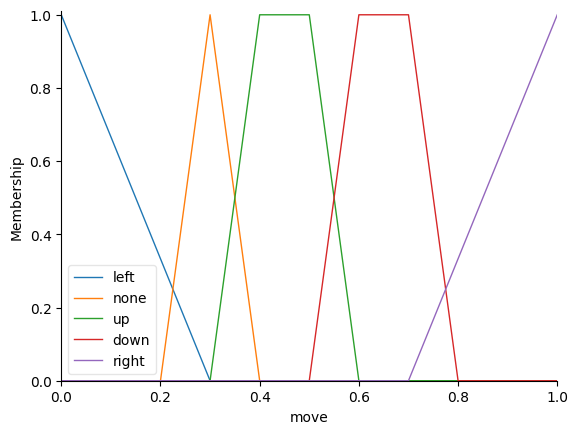

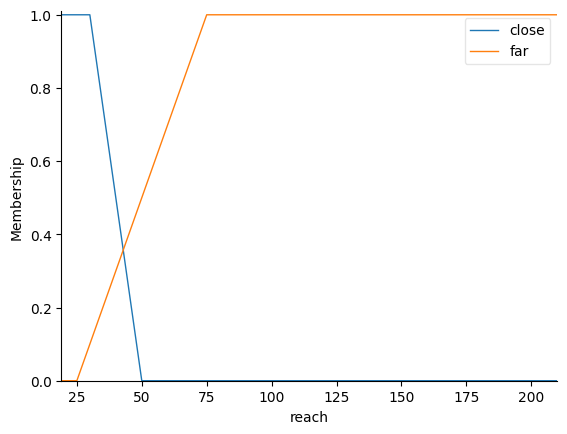

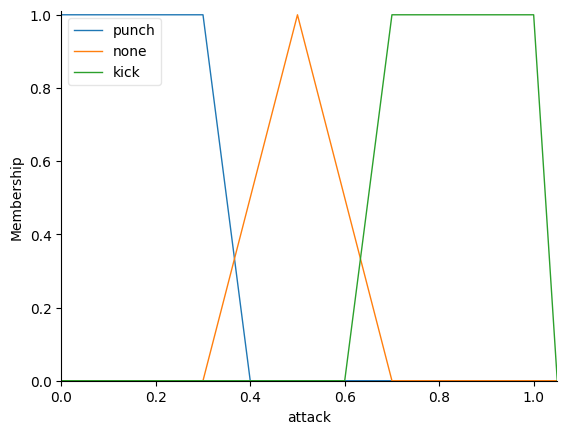

In [8]:
#Antecedent range
move_range = np.arange(0, 1.1, 0.1)     #move
reach_range = np.arange(19, 211, 1)     #reach
#Consequent range
attack_range = np.arange(0, 1.1, 0.05)

#Antecedent(s)
move = ctrl.Antecedent(move_range, 'move')
reach = ctrl.Antecedent(reach_range, 'reach')

#move memebrship function
move['left'] = fuzz.trimf(move_range, [0, 0, 0.3])
move['none'] = fuzz.trimf(move_range, [0.2, 0.3, 0.4])
move['up'] = fuzz.trapmf(move_range, [0.3, 0.4, 0.5, 0.6])
move['down'] = fuzz.trapmf(move_range, [0.5, 0.6, 0.7, 0.8])
move['right'] = fuzz.trimf(move_range, [0.7, 1, 1])
#reach membership function
reach['close'] = fuzz.trapmf(reach_range, [19, 19, 30, 50])
reach['far'] = fuzz.trapmf(reach_range, [25, 75, 210, 210])

#Consequent(s)
attack = ctrl.Consequent(attack_range, 'attack')

#attack mebership function
attack['punch'] = fuzz.trapmf(attack_range, [0, 0, 0.3, 0.4])
attack['none'] = fuzz.trimf(attack_range, [0.3, 0.5, 0.7]) 
attack['kick'] = fuzz.trapmf(attack_range, [0.6, 0.7, 1, 1])

move.view()
reach.view()
attack.view()

number of moves made: 2389


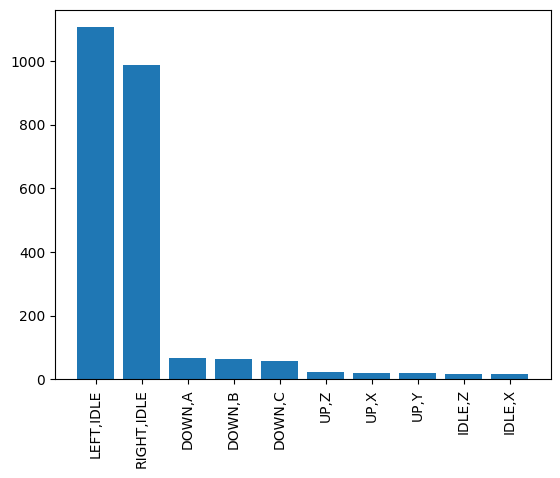

In [134]:
df = pd.read_csv("fz_record.csv")
print('number of moves made:', len(df))

df_actions = df['actions'].value_counts().head(10)
actions_dict = df_actions.to_dict()

df_def = pd.read_csv('actions_cleaned.csv')

actions_plot = {}

for key in actions_dict:
    key_def = df_def.loc[df_def['actions'] == key]
    new_key = key_def.iloc[0]['move_defs'] + "," + key_def.iloc[0]['att_defs']
    
    actions_plot[new_key] = actions_dict[key]

data = actions_plot
names = list(data.keys())
values = list(data.values())

plt.bar(range(len(data)), values, tick_label=names)
plt.xticks(rotation=90)
plt.show()

number of moves made: 9709


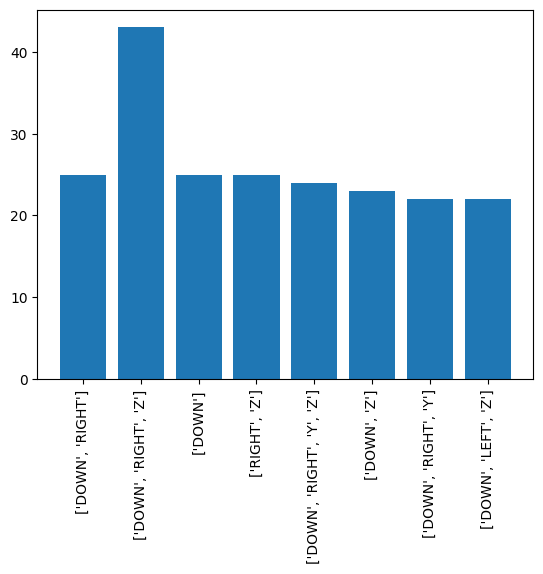

In [132]:
df = pd.read_csv("ppo_record.csv")
print('number of moves made:', len(df))

df_actions = df['actions'].value_counts().head(10)
actions_dict = df_actions.to_dict()

df_def = pd.read_csv('actions.csv')

actions_plot = {}

for key in actions_dict:
    key_def = df_def.loc[df_def['actions'] == key]
    new_key = key_def.iloc[0]['definitions']
    
    actions_plot[new_key] = actions_dict[key]

data = actions_plot
names = list(data.keys())
values = list(data.values())

plt.bar(range(len(data)), values, tick_label=names)
plt.xticks(rotation=90)
plt.show()

In [151]:
df_fz = pd.read_csv('fz_compare.csv')
df_ppo = pd.read_csv('ppo_compare.csv')

fz_list = df_fz.loc[0].values.flatten().tolist()
ppo_list = df_ppo.loc[0].values.flatten().tolist()

print(ppo_list[0:1])

[27]


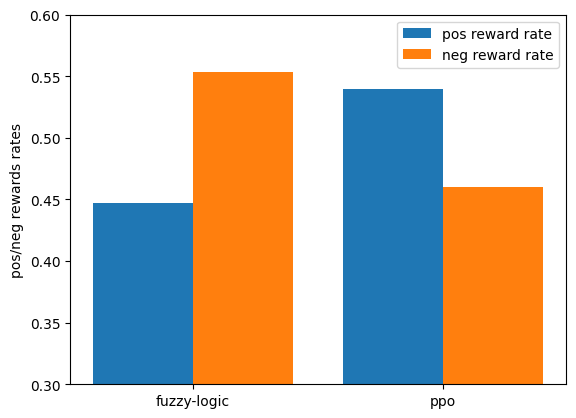

In [177]:
w = 0.4
x = ['fuzzy-logic', 'ppo']

fz_re_total = fz_list[0] + fz_list[1]
ppo_re_total = ppo_list[0] + ppo_list[1]

bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]

plt.bar(bar1, 
        [fz_list[0]/fz_re_total, ppo_list[0]/ppo_re_total],
        w, label='pos reward rate'
       )
plt.bar(bar2, 
        [fz_list[1]/fz_re_total, ppo_list[1]/ppo_re_total], 
        w, label='neg reward rate'
       )
plt.ylim(0.3, 0.6)

plt.xticks((bar1+bar2)/2, x)
plt.ylabel('pos/neg rewards rates')
plt.legend()

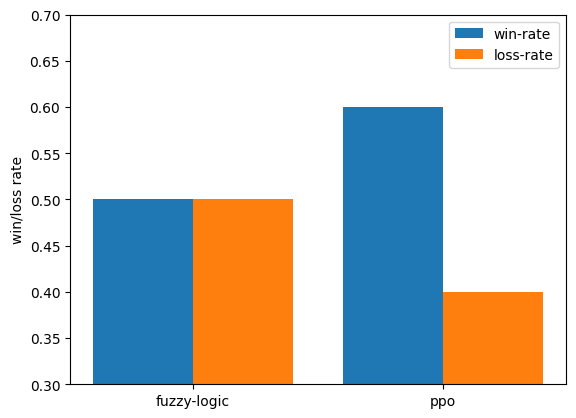

In [175]:
w = 0.4
x = ['fuzzy-logic', 'ppo']

fz_re_total = fz_list[2] + fz_list[3]
ppo_re_total = ppo_list[2] + ppo_list[3]

bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]

plt.bar(bar1, 
        [fz_list[2]/fz_re_total, ppo_list[2]/ppo_re_total],
        w, label='win-rate'
       )
plt.bar(bar2, 
        [fz_list[3]/fz_re_total, ppo_list[3]/ppo_re_total], 
        w, label='loss-rate'
       )
plt.ylim(0.3, 0.7)

plt.xticks((bar1+bar2)/2, x)
plt.ylabel('win/loss rate')
plt.legend()

In [178]:
fz_reward = pd.read_csv("fz_record.csv")

fz_reward_dict = fz_reward['rewards'].value_counts().to_dict()

fz_reward_total = 0
fz_reward_count = 0

for key in fz_reward_dict:
    if key != 0:
        fz_reward_total += key * fz_reward_dict[key]
        fz_reward_count += fz_reward_dict[key]

print(fz_reward_total, fz_reward_count)

4962.3762468447 15


In [170]:
ppo_reward = pd.read_csv("ppo_record.csv")

ppo_reward_dict = ppo_reward['rewards'].value_counts().to_dict()

ppo_reward_total = 0
ppo_reward_count = 0

for key in ppo_reward_dict:
    if key != 0:
        ppo_reward_total += key * ppo_reward_dict[key]
        ppo_reward_count += ppo_reward_dict[key]

print(ppo_reward_total, ppo_reward_count)

16898.277725300002 50


(300.0, 350.0)

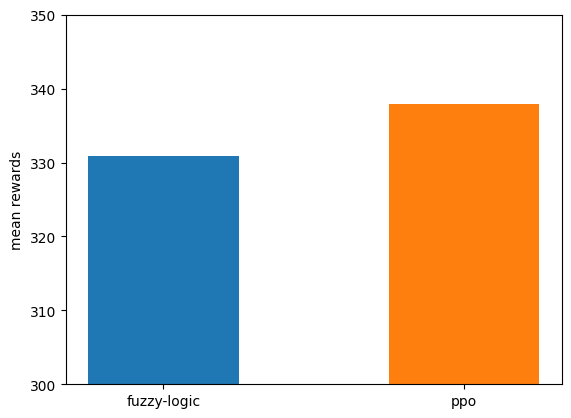

In [176]:
x = ['fuzzy-logic', 'ppo']

bar1 = np.arange(len(x))

plt.bar(x[0], fz_reward_total/fz_reward_count, 0.5)
plt.bar(x[1], ppo_reward_total/ppo_reward_count, 0.5)
plt.ylabel('mean rewards')
plt.ylim(300,350)

In [ ]:
x = ['fuzzy-logic', 'ppo']

bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]

plt.bar(bar1, 
        [fz_list[2]/fz_re_total, ppo_list[2]/ppo_re_total],
        w, label='win-rate'
       )
plt.bar(bar2, 
        [fz_list[3]/fz_re_total, ppo_list[3]/ppo_re_total], 
        w, label='loss-rate'
       )
plt.ylim(0.3, 0.7)

plt.xticks((bar1+bar2)/2, x)
plt.ylabel('win/loss rate')
plt.legend()